In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def load_squirrel_data(edges_path, features_path):
    """Load Squirrel Dataset"""
    edges = pd.read_csv(edges_path, sep='\s+', header=0)  # Assuming space-separated values with header
    features = pd.read_csv(features_path, sep='\s+', header=0)  # Assuming space-separated values with header
    
    return features, edges

def create_graph(edges):
    """Creates a Graph from the edge list"""
    G = nx.Graph()
    edges_list = list(zip(edges['node_id'], edges['node_id.1']))
    G.add_edges_from(edges_list)
    
    return G

def visualize_graph(G):
    """Visualize the Graph"""
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_size=10, node_color='blue', edge_color='gray', with_labels=False)
    plt.show()

In [3]:
edges_path = 'squirrel/out1_graph_edges.txt'
features_path = 'squirrel/out1_node_feature_label.txt'

# Load the dataset
features, edges = load_squirrel_data(edges_path, features_path)

In [4]:
# Print some basic information
print("Columns of node feature label file:")
print(features.columns)

print("\nColumns of graph edges file:")
print(edges.columns)

Columns of node feature label file:
Index(['node_id', 'feature', 'label'], dtype='object')

Columns of graph edges file:
Index(['node_id', 'node_id.1'], dtype='object')


In [6]:
# Sample a few rows from the feature file
print("\nSample rows from feature data:")
print(features.head())


Sample rows from feature data:
   node_id                                            feature  label
0        0  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...      1
1        1  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...      3
2        2  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...      0
3        3  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...      0
4        4  0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...      4


In [7]:
# Create and visualize the graph
G = create_graph(edges)
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average degree: {sum(dict(G.degree()).values()) / G.number_of_nodes():.2f}")

Number of nodes: 5201
Number of edges: 198493
Average degree: 76.33


In [10]:
import numpy as np
import torch

def get_labels(squirrel_content):
    """Extracts labels from the Squirrel dataset."""
    labels = squirrel_content['label'] 
    print(f"Number of labels: {len(labels)}")
    
    return labels

def check_class_proportion(labels):
    """Checks and prints the proportion of each class label."""
    if isinstance(labels, torch.Tensor):
        labels = labels.numpy()
    
    unique_labels, counts = np.unique(labels, return_counts=True)

    total_samples = len(labels)
    proportions = counts / total_samples

    print("Proportion in Squirrel Dataset:")
    for label, count, proportion in zip(unique_labels, counts, proportions):
        print(f"{label}: {count} samples, {proportion:.4f} proportion")
    
    return unique_labels, counts, proportions


labels = get_labels(features)  
check_class_proportion(labels)


Number of labels: 5201
Proportion in Squirrel Dataset:
0: 1042 samples, 0.2003 proportion
1: 1040 samples, 0.2000 proportion
2: 1039 samples, 0.1998 proportion
3: 1040 samples, 0.2000 proportion
4: 1040 samples, 0.2000 proportion


(array([0, 1, 2, 3, 4], dtype=int64),
 array([1042, 1040, 1039, 1040, 1040], dtype=int64),
 array([0.20034609, 0.19996155, 0.19976928, 0.19996155, 0.19996155]))

In [9]:
# visualize_graph(G)

In [12]:
def calculate_homophily_score(graph, labels):
    """
    Calculate the homophily score for a given graph and node labels = proportion of edges that connect nodes with the same label.
    """
    same_label_edges = 0
    total_edges = graph.number_of_edges()
    
    for u, v in graph.edges():
        if labels[u] == labels[v]:
            same_label_edges += 1
    
    homophily_score = same_label_edges / total_edges if total_edges > 0 else 0
    print("Total Links:", total_edges)
    print("Same Class Links:", same_label_edges)
    print(f"Homophily Score: {homophily_score:.4f}")
    
    return homophily_score


squirrel_labels = get_labels(features) 
squirrel_graph = create_graph(edges)  
squirrel_homophily = calculate_homophily_score(squirrel_graph, squirrel_labels)


Number of labels: 5201
Total Links: 198493
Same Class Links: 44201
Homophily Score: 0.2227


Done loading data from cached files.


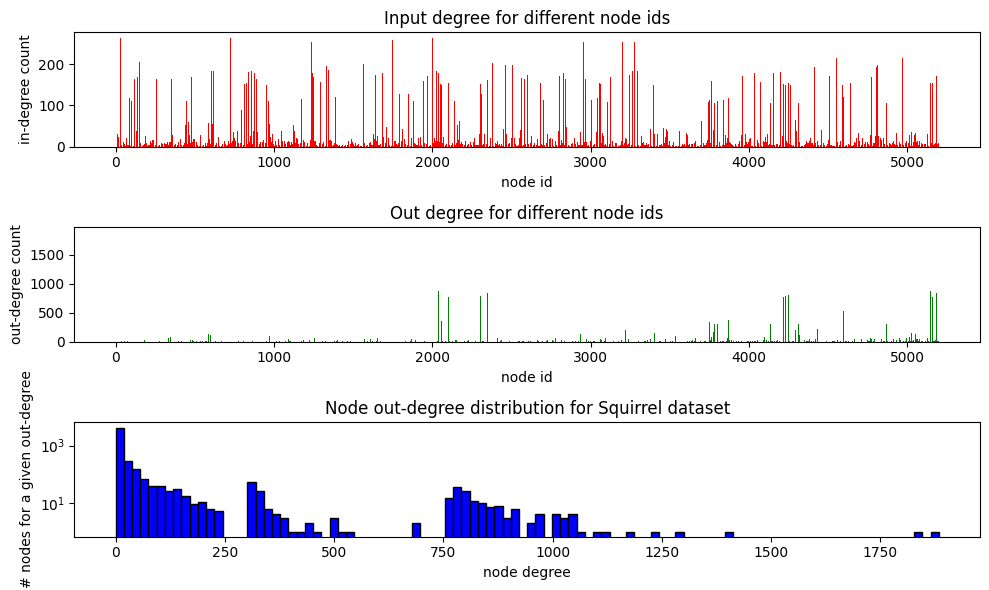

In [1]:
import matplotlib.pyplot as plt
import dgl
from dgl.data import SquirrelDataset

# Load the Squirrel dataset
dataset = SquirrelDataset()
g = dataset[0]

# Get the in-degree and out-degree for each node
in_degrees = g.in_degrees().numpy()
out_degrees = g.out_degrees().numpy()

# Plot the in-degree for each node id
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.bar(range(len(in_degrees)), in_degrees, color='red')
plt.title('Input degree for different node ids')
plt.xlabel('node id')
plt.ylabel('in-degree count')

# Plot the out-degree for each node id
plt.subplot(3, 1, 2)
plt.bar(range(len(out_degrees)), out_degrees, color='green')
plt.title('Out degree for different node ids')
plt.xlabel('node id')
plt.ylabel('out-degree count')

# Plot the out-degree distribution
plt.subplot(3, 1, 3)
plt.hist(out_degrees, bins=100, color='blue', edgecolor='black', log=True)
plt.title('Node out-degree distribution for Squirrel dataset')
plt.xlabel('node degree')
plt.ylabel('# nodes for a given out-degree')

plt.tight_layout()
plt.show()
